In [ ]:
%pip install scipy numpy matplotlib nitime

## Utility Functions

Run the cell below, but feel free to ignore this code — it’s some utility functions we’ll use later for convenience.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq

def get_fft(data, time_vec):
    """
    Calculates the Fourier transform and frequencies of the transform for a signal
    """

    # Step 1: calculate the power spectrum by taking the fourier transform of the signal
    fft_result = fft(data)

    # Step 2: Get all frequencies for which the power spectrum was calculated in step 1
    freqs = fftfreq(len(data), d=(time_vec[1]-time_vec[0])) 

    # Step 3A: Extract positive frequencies only
    positive_freqs = freqs[freqs > 0]
    # Step 3B: Extract power spectrum for positive frequencies only
    fft_result_positive = fft_result[freqs > 0]

    # Step 4: Get real part of spectrum to get amplitude and normalize it
    psd_norm = np.abs(fft_result_positive)/np.abs(fft_result_positive).max()
    
    return positive_freqs, psd_norm

def plot_signal(sig, time_vec):
    """Makes plot of signal"""
    plt.figure(figsize=(4,3))
    plt.plot(time_vec,sig)
    plt.title('Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

class utils:
    get_fft = get_fft
    plot_signal = plot_signal


# Introduction

In this notebook, you will learn tools and methods to calculate the power spectrum of a signal. A power spectrum shows the magnitude of oscillations at different frequencies in a signal.

## Section 1

### Calculate the total frequency content of a signal with the Fourier Transform

The Fourier transform is a standard way to calculating the power spectrum of a signal. Here, you will apply the Fourier transform to different toy signals to get a better intuition for the relationship between peaks in the power spectrum and oscillations in your original signal.

| Code | Description |
| :-- | :-- |
| `freq, psd = utils.get_fft(sig, times_sampled)` | Calculate the power spectral density (``psd``) of a signal `sig` with the Fourier transform. `times_sampled` contains the time points at which the signal was sampled. |
| `utils.plot_signal(sig, times_sampled)` | Plots the signal `sig` against the time points the signal was sampled ``times_sampled`` |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.xlim([some_lower_xlim, some_upper_xlim])`                 | Limit the x-axis in a plot to be betwen the numbers ``some_lower_xlim`` and ``some_upper_xlim``. |

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fft, fftfreq

**Example**: Calculate and plot the power spectrum for the sinusoid signal oscillating at ``5`` Hz generated below using the Fourier transform.

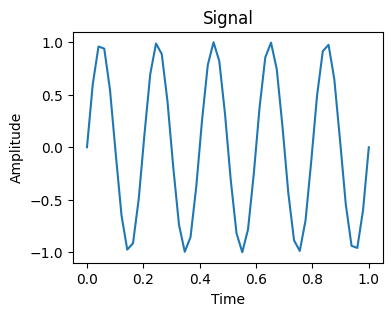

In [3]:
# provided

# Generate sine signal
time_vec = np.linspace(0,1,50) # seconds
frequency = 5 # Hz
sine = np.sin(2*np.pi*frequency*time_vec)

utils.plot_signal(sine, time_vec)

Text(0.5, 1.0, 'Power spectrum of signal')

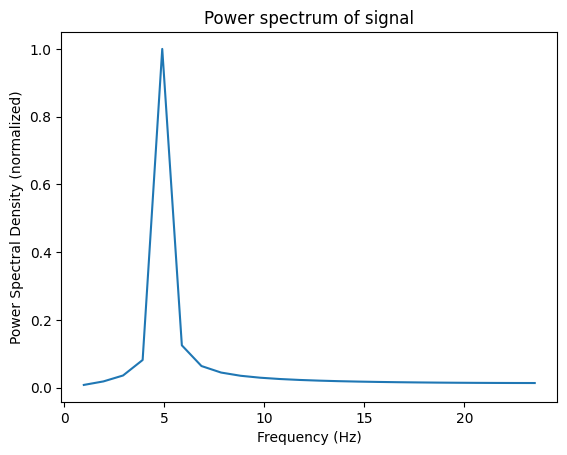

In [4]:
# solution
freqs, psd = utils.get_fft(sine, time_vec)

plt.plot(freqs,psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (normalized)')
plt.title('Power spectrum of signal')

**Exercise**: Calculate and plot the power spectrum for the sinusoid signal generated below oscillating at ``20`` Hz using the Fourier transform.

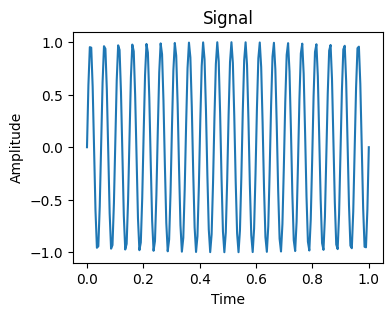

In [5]:
# Generate signal
time_vec = np.linspace(0,1,200) # seconds
frequency = 20 # Hz
sine = np.sin(2*np.pi*frequency*time_vec)

utils.plot_signal(sine, time_vec)

In [6]:
# solution



**Exercise**: Calculate and plot the power spectrum for the composite signal consisting of two sinusoids using the Fourier Transform. Note that the variable containing the composite signals is called `composite_signal` when you calculate the power spectrum with the `utils.get_fft` function.

Which frequencies do the two sinusoids that make up the composite signal oscillate at?

*Hint*: If the spectral peaks are all to the left in the plot, you can limit the x-axis to focus on them by adding the line `plt.xlim([lower_limit, upper_limit])` (insert numbers for `lower_limit` and `upper_limit`).

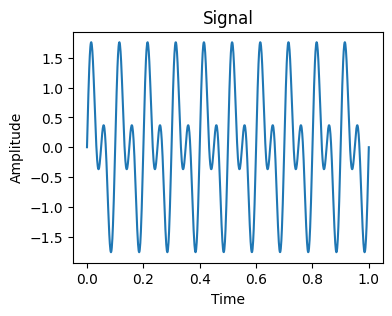

In [7]:
# provided

# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequencyA = 10 # Hz
sineA = np.sin(2*np.pi*frequencyA*time_vec)

frequencyB = 20 # Hz
sineB = np.sin(2*np.pi*frequencyB*time_vec)

composite_signal = sineA+sineB

utils.plot_signal(composite_signal, time_vec)

In [8]:
# solution


**Exercise**: Calculate and plot the frequency spectrum for the chirp signal (`chirp_signal`) generated below which is gradually increasing its frequency from 1 to 15 Hz.

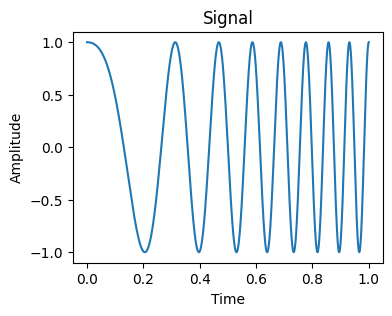

In [9]:
# provided

sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds

# generate chirp signal
chirp_signal = signal.chirp(time_vec, f0=1, f1=15, t1=1)

utils.plot_signal(chirp_signal, time_vec)

In [10]:
# solution


**Exercise**: Calculate and plot the frequency spectrum for the composite signal generated below consisting of a sine wave with a 30 Hz frequency and a chirp signal increasing from 1 to 15 Hz using the ``get_fft`` function.

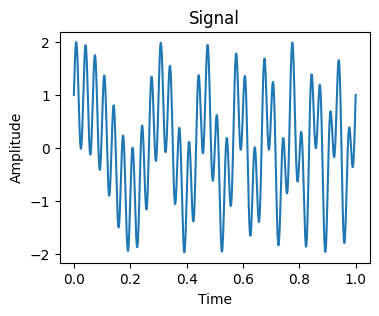

In [11]:
# provided

# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds

# set frequency of sine wave and generate it
frequency = 30 # Hz
sineA = np.sin(2*np.pi*frequency*time_vec)

# generate chirp signal
chirp_signal = signal.chirp(time_vec, f0=1, f1=15, t1=1)

# create composite signal by summing sine wave and chirp signal
composite_signal = sineA+chirp_signal

utils.plot_signal(composite_signal, time_vec)

In [12]:
# solution



## Section 2

### Welch's method

One way to reduce the noise in your power spectrum is to use Welch's method to calculate the spectrum. In Welch's method, your signal is divided up into segments and a power spectrum is computed for each individual segment using the Fourier transform. The final power spectrum for the whole signal period is then calculated by averaging across the power spectra for the individual segments. If you have divided your signal in to 10 segments, the final spectrum will be the average of 10 segment spectra. The length of each segment can be set with a parameter in the function from `scipy` called `signal.welch` that you will use to calculate the spectrum with Welch's method.

| Code | Description |
| :-- | :-- |
| `freqs, psd = signal.welch(sig, fs = sampling_frequency, nperseg = some_number)` | Calculate the power spectral density (``psd``) of a signal `sig` using Welch's method. `nperseg` sets the number of samples of the signal in each segment, default value is 256. |
| `psd = psd/psd.max()`| Normalize spectrum by dividing by maximum value. |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.xlim([some_lower_xlim, some_upper_xlim])`                 | Limit the x-axis in a plot to be betwen the numbers ``some_lower_xlim`` and ``some_upper_xlim``. |
| `np.linspace(start, stop, n)`    | Generates an array of `n` evenly spaced values from `start` to `stop`.                        |                 
| `np.sin(2*np.pi*f*time_vec + phase)`         | Generates a sine wave oscillating with a frequency `f` over a time period `time_vec` (a vector of time points) |
| `signal.chirp(time_vec, f0, f1, t1)` | Generates a chirp signal, which is a signal where the frequency changes over time. |
| ` np.random.normal(0,1,n_samples)` | Generates an array of random values from a Gaussian (normal) distribution. The array will be of length `n_samples`. |


In [13]:
from scipy import signal

**Example**: Use welch's method to calculate the frequency spectrum for the signal generated below. Plot the result.

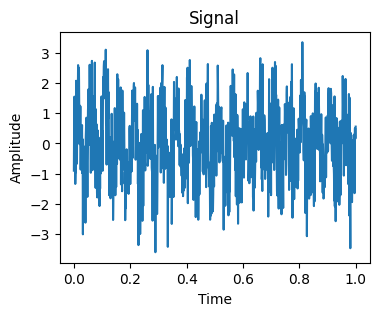

In [14]:
# Generate signal
sampling_frequency = 1000 # sampling frequency (Hz)
duration = 1 # seconds
time_vec = np.linspace(0,duration,sampling_frequency) # seconds
frequency = 20 #
pure_sine = np.sin(2*np.pi*frequency*time_vec)

# generate noise
noise = np.random.normal(0,1,len(time_vec))

# add noise to sine wave
sine = pure_sine + noise

utils.plot_signal(sine,time_vec)

Text(0, 0.5, 'Power spectral density (normalized)')

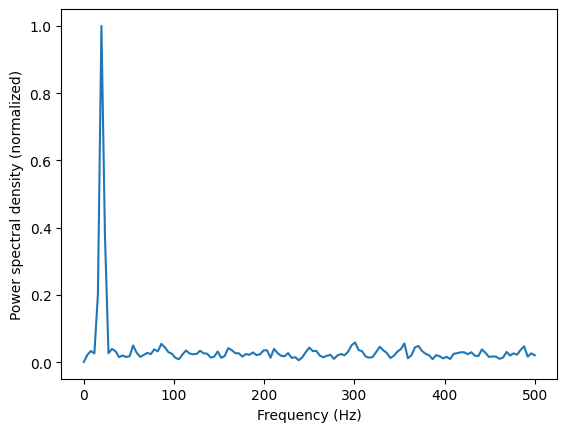

In [15]:
# solution

# calculate power spectral density with Welch's method
freqs, psd = signal.welch(sine, fs = sampling_frequency)

# normalize
psd = psd/psd.max()

plt.plot(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (normalized)')

**Exercise**: Use welch's method to calculate the frequency spectrum for the composite signal below consisting of of two sine waves with frequencies 10 Hz and 20 Hz and . Plot the result.

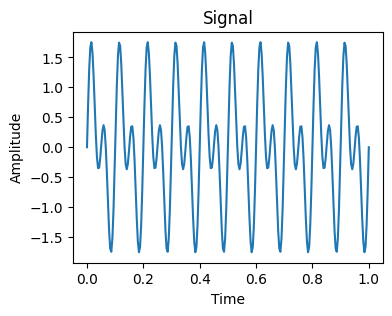

In [16]:
# provided

# Create composite signal
sampling_frequency = 256
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequencyA = 10 # Hz
sineA = np.sin(2*np.pi*frequencyA*time_vec)

frequencyB = 20 # Hz
sineB = np.sin(2*np.pi*frequencyB*time_vec)

composite_signal = sineA+sineB

utils.plot_signal(composite_signal, time_vec)

In [17]:
# solution



**Exercise**: Use welch's method to calculate the frequency spectrum for the composite signal generated below consisting of of a sine wave with frequency 30 Hz, a chirp signal starting at 1 Hz and increasing to 15 Hz, and noise. Plot the result. 

*Hint*: If the spectral peaks are all to the left in the plot, you can limit the x-axis to focus on them using `plt.xlim([lower_limit, upper_limit])` (insert numbers for `lower_limit` and `upper_limit`).

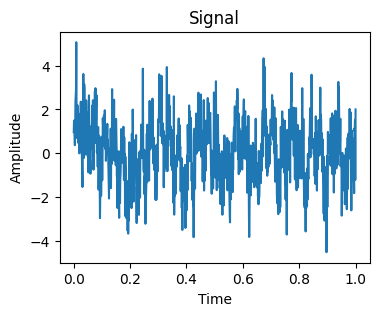

In [18]:
# provided

# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequency = 30 # Hz
sineA = np.sin(2*np.pi*frequency*time_vec)

chirp_signal = signal.chirp(time_vec, f0=1, f1=15, t1=1)

noise = np.random.normal(0,1,len(time_vec))

composite_signal = sineA+chirp_signal+noise

utils.plot_signal(composite_signal, time_vec)

In [19]:
# solution


**Exercise**: Calculate and plot the spectrum again using welch's method on the same signal, but this time, set the parameter `nperseg` to 50 (`nperseg = 50`) inside the `welch` function. Can you still tell the peaks of the two original signals that make up the composite signal apart? 

In [20]:
# solution


**Exercise**: Change the `nperseg` parameter to 500 and calculate and plot the spectrum again.

In [21]:
# solution



The `nperseg` parameter sets the size of the segment of the signal that each frequency spectrum is calculated for in Welch's method. If the signal contains 1000 samples, and the `nperseg` is 500 (and there's no overlap between segments[<sup>1</sup>](#fn1)), you will have 2 segments of length 500 for which the spectrum is calculated, and the final spectrum is the average of the spectra for those two segments. If the signals contains 1000 samples and `nperseg` is 50, then you'll have 20 segments, and the final spectrum is the average of those 20 individual spectra.

With many small segments, you get the average of many spectra, which reduces the effect of noise. However, by averaging over many spectra, you will decrease your frequency resolution (it's harder to tell the peaks apart, as we saw in the exercise with `nperseg = 50`). With fewer, longer segments, the frequency resolution is higher, but the noise will be more prominent in the final spectrum. Which value to choose for `nperseg` will depend on the signal-to-noise ratio of your signal and how important it is to have a high frequency resolution.

<span id="fn1"><sup>1</sup> With Welch's method, there is some overlap between segments. That was just not taken into account in this example to keep it simpler.</span>

**Exercise**: The overlap between segments in Welch's method can also be adjusted with the `noverlap` parameter. Keep `nperseg = 500`, but set `noverlap` to 20 and recalculate and plot the resulting spectrum.

In [22]:
# solution


**Exercise**: Keep `nperseg = 500`, but set `noverlap` to 400 and recalculate and plot the resulting spectrum. What happens to the first (leftmost) peaks in the spectrum? Can you explain why?

In [23]:
# solution


## Section 3

### Multitapering

Similar to Welch's method, multitapering is also based on averaging across multiple spectra, though the method for calculating the individual spectra is slightly different. With multitapering, your signal is multiplied with different "tapers", as they are called (ilustrated in panel B in the figure below). The Fourier transform is calculated for each of the differently tapered signals to get a collection of power spectra. In the end, these individual power spectra are averaged to produce the total power spectrum (panel E).

<br>
<img src="Resources/multitapering_illustration.png" alt="Filter types" width="50%" height="40%">


From: Analyzing Neural Time Series, Chapter 16: Multitapers, Mike Cohen.

| Code | Description |
| :-- | :-- |
| `freqs, psd_mt = multi_taper_psd(sig, Fs)` | Calculate the power spectral density using multitapering. `Fs` is the sampling frequency. |
| `plt.plot(x, y)` | Plot y values against x values. |

In [24]:
from nitime.algorithms import multi_taper_psd

**Example**: Use the multitapering method to calculate the power spectrum for the signal generated below. Plot the power spectrum against frequencies.

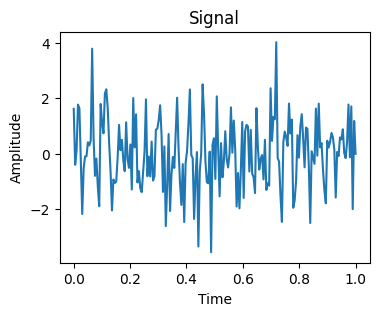

In [25]:
# provided

# Generate signal
sampling_frequency = 200 # sampling frequency (Hz)
duration = 1 # seconds
time_vec = np.linspace(0,duration,sampling_frequency) # seconds
frequency = 20 #
pure_sine = np.sin(2*np.pi*frequency*time_vec)

# generate noise
noise = np.random.normal(0,1,len(time_vec))

# add noise to sine wave
sine = pure_sine + noise

utils.plot_signal(sine, time_vec)

Text(0.5, 1.0, 'Multitaper PSD')

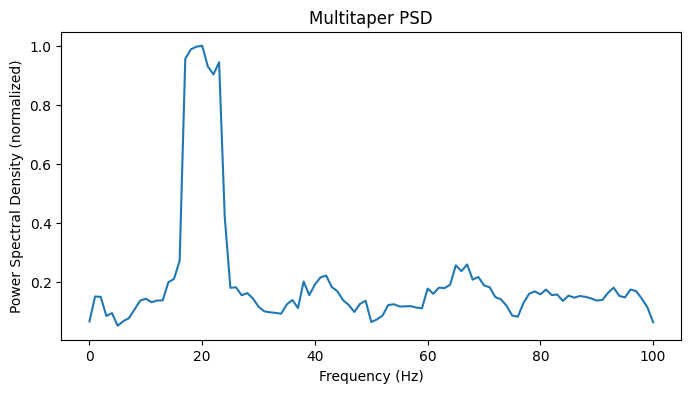

In [26]:
# solution

freqs, psd_mt, _ = multi_taper_psd(sine, Fs=sampling_frequency)

# normalize
psd_mt = psd_mt/psd_mt.max()

# Plot the result
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd_mt)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (normalized)')
plt.title('Multitaper PSD')

**Exercise**: Use the multitapering method to calculate the spectrum for the composite signal below consisting of of two sine waves with frequencies 10 Hz and 20 Hz. Plot the result.

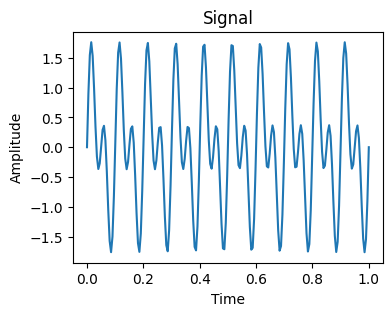

In [27]:
# provided 

# Create composite signal
sampling_frequency = 200
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequencyA = 10 # Hz
sineA = np.sin(2*np.pi*frequencyA*time_vec)

frequencyB = 20 # Hz
sineB = np.sin(2*np.pi*frequencyB*time_vec)

composite_signal = sineA+sineB

utils.plot_signal(composite_signal, time_vec)

In [28]:
# solution


**Exercise**: Use the multitapering method to calculate the power spectrum for the composite signal generated below consisting of of a sine wave with frequency 30 Hz, a chirp signal, and noise. Plot the power spectrum against frequencies. 

*Hint*: If the spectral peaks are all to the left in the plot, you can limit the x-axis to focus on them using `plt.xlim([lower_limit, upper_limit])` (insert numbers for `lower_limit` and `upper_limit`).

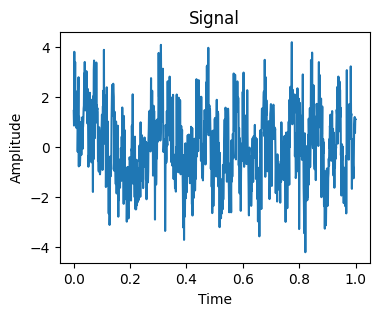

In [29]:
# provided

# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequency = 30 # Hz
sineA = np.sin(2*np.pi*frequency*time_vec)

chirp_signal = signal.chirp(time_vec, f0=1, f1=15, t1=1)

np.random.seed(5)
noise = np.random.normal(0,1,len(time_vec))

composite_signal = sineA+chirp_signal+noise

utils.plot_signal(composite_signal, time_vec)

In [30]:
# solution


## Section 4

### Comparing frequency spectra calculated with different methods.

As you may have noticed in the previous sections, the different methods for computing power spectra tend to produce similar, but not identical results. How the power spectrum looks depends not only on the method used, but also on the particular parameters you used when calculating it. To make sure that your results aren't just an artifact of the particular method and parameters you chose, it can be a good idea to double check with other methods.

| Code | Description |
| :-- | :-- |
| `freqs_mt, psd_mt =`<br> &nbsp;&nbsp;&nbsp;&nbsp;`multi_taper_psd(sig, sampling_frequency)`| Calculate the power spectral density using multitapering. `Fs` is the sampling frequency. |
| `freqs_welch, psd_welch = signal.welch(sig, sampling_frequency, nperseg = some_num)` | Calculate the power spectral density of a signal `sig` using Welch's method. `nperseg` sets the number of samples of the signal in each segment, default value is 256. |
| `freqs_ft, psd_ft =`<br> &nbsp;&nbsp;&nbsp;&nbsp;` get_fft(sig, times_sampled)` | Calculate the power spectrum with the Fourier transform.|
| `plt.plot(x, y)` | Plot y values against x values. |
| `fig, ax = plt.subplots(nrows, ncols)` | Tells python to create a grid of subplots with `nrows` number of rows and `ncols` number of columns. `ax` can be indexed to refer to a specific subplot, e.g. the subplot on the first row and second column would be `ax[0,1]`. |

**Excercise**: Use all three methods - fourier transform, the multitapering method, and welch's method - to calculate three different frequency spectra for the composite signal below. Make separate figures and plot and compare the results. 

What do you notice? What does the differences between the plots suggest with respect to how well each method deals with noise? How good is the frequency resolution for each method?

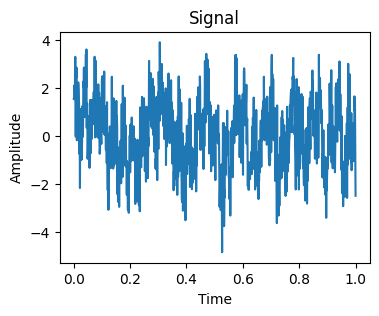

In [31]:
# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequency = 30 # Hz
sineA = np.sin(2*np.pi*frequency*time_vec)

chirp_signal = signal.chirp(time_vec, f0=1, f1=15, t1=1)

noise = np.random.normal(0,1,len(time_vec))

composite_signal = sineA+chirp_signal+noise

utils.plot_signal(composite_signal, time_vec)

In [32]:
# solution multitapering


In [33]:
# solution Welch's method


In [34]:
# solution fourier transform


**Exercise**: Make figure with subplots with the spectrum from each method in a subplot.

In [35]:
# solution